In [1]:
%matplotlib inline

import math
import pandas as pd
import matplotlib.pyplot as plt


# pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
df = pd.read_csv('data/arch-survey-responses.csv')
df.columns = ['stamp', 'packs', 'use', 'time', 'de', 'disk']

In [3]:
df[:3]

,stamp,packs,use,time,de,disk
0,2018/06/23 12:03:26 am GMT+9:30,1599,School/homework,1 year,KDE Plasma,NaN
1,2018/06/23 12:10:37 am GMT+9:30,861,All of the above,2 months,Xmonad,NaN
2,2018/06/23 12:16:30 am GMT+9:30,2176,Programming,3 years,i3,16628.0


In [4]:
n_packages_series = df['packs']
mean_packages = int(round(n_packages_series.mean()))
print('Average number of packages installed: {}'.format(mean_packages))

Average number of packages installed: 1096


In [5]:
time_installed_series = df['time']

conversions = {'1 month': 1,
 '1 year': 12,
 '2 months': 2,
 '2 years': 24,
 '3 months': 3,
 '3 years': 36,
 '5 months': 5,
 '5 years': 60,
 '8 months': 8,
 '8 years': 96,
 'when Arch was first released in 2002': 196}

time_installed_converted = pd.Series(map(lambda s:conversions[s], filter(lambda t: type(t) == str, time_installed_series)))
time_installed = int(round(time_installed_converted.mean()))
print('Average time system installed was {} months.'.format(time_installed))

time_installed_series.value_counts()

Average time system installed was 20 months.


1 year                                  21
2 years                                 10
3 years                                  9
1 month                                  8
2 months                                 6
3 months                                 5
8 months                                 3
5 years                                  2
8 years                                  2
5 months                                 2
when Arch was first released in 2002     1
Name: time, dtype: int64

So is there a correlation between time since the system was installed and the number of packages installed?

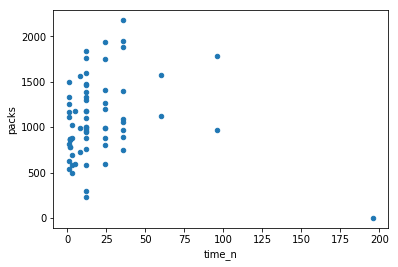

In [6]:
df['time_n'] = df.apply(lambda row: conversions.get(row['time']), axis=1)

df.plot.scatter(x='time_n', y='packs')

So this doesn't seem to show much... apart from the fact that there is a lot of variation.

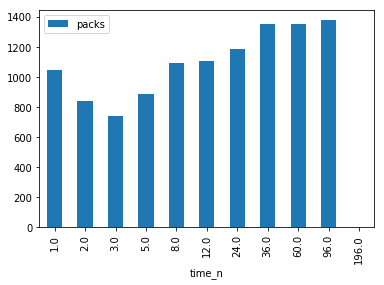

In [7]:
frame = df[['packs', 'time_n']].groupby(['time_n']).mean()
frame.plot(kind='bar')

Ah now this is interesting. The general trend line in this case seems to start at an average of 1000 packages installed when the system is around a month old. It gradually decreases for a few months, before steadily increasing over the next few years, before remaining relatively steady. There isn't much data to go by for the points greater than 3 years, so take with a pinch of salt. Also note that the scale isn't linear...

My theory with this is that an Arch user goes through several stages:

1. new install: test out all the things!! (high number of packages)
2. settling in: removing unnecessary packages and keeping the system tidy in general (decrease in packages)
3. serious use: the system gradually is used for more things over time, and the packages build up. (steady increase)
4. home sweet home: everything you'll ever need is installed. Yes there's some cruft, but why bother tidying up since it all just works?

¯\\_(ツ)\_/¯